# House Prices Dataset

- Question or problem definition.
- Acquire training and testing data.
- Wrangle, prepare, cleanse the data.
- Analyze, identify patterns, and explore the data.
- Model, predict and solve the problem.
- Visualize, report, and present the problem solving steps and final solution.
- Supply or submit the results.


## Question or problem definition

In this dataset we have the house prices of houses in Ames, Iowa. Since it is a very descriptive dataset, there are a lot of things we can do with this dataset. However, to keep it short and sweet, let us define the scope of this analysis to be to complete a comprehensive exploratory data analysis (EDA) of the house prices and to build a regressor model of the prices of the houses based on the columns in the training set to predict house prices in the test set/validation set.

Before you get started with this notebook, it is highly recommmended to go through this paper from the author of the dataset to get an overview of the dataset and how the usage is intended.
https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

## Acquire training and testing data

Let's import the data into the notebook from the training and test csv file and get all the packages we need for this analysis imported into the notebook too. Here we will be showing the structure and nature of values available on the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy.stats import skew


%matplotlib inline

In [2]:
df_train = pd.read_csv('house-prices/train.csv')
df_test = pd.read_csv('house-prices/test.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Wrangle, prepare, cleanse the data.

- Finding out if there are any duplicate entries in the dataset
- Finding out about the type of columns: numeric and categorical
- Finding out the missing data in each column
- Filling in missing values with relevant data
- Finding and removing outliers from the data
- Finding out distribution of the variables

### Finding out the number of duplicate entries in the dataset

In [6]:
uniqueRows = len(set(df_train.Id))
totalRows = len(df_train.Id)
duplicateRows = totalRows - uniqueRows

# Tip: Assert allows you to test simple stuff in your data analysis as you go/sanity checks
assert (duplicateRows==0)

# Dropping the column Id because the column is not significant beyond this
df_train = df_train.drop(['Id'],axis=1)

### Finding out about the type of columns: numeric and categorical

In [7]:
numeric = [col for col in df_train.columns if df_train.dtypes[col] != 'object']
#quantitative.remove('SalePrice')
#quantitative.remove('Id')
categorical = [col for col in df_train.columns if df_train.dtypes[col] == 'object']
print("\nNumeric columns\n")
print(numeric)
print("\nCategorical columns\n")
print(categorical)


Numeric columns

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

### Finding out the missing data in each column

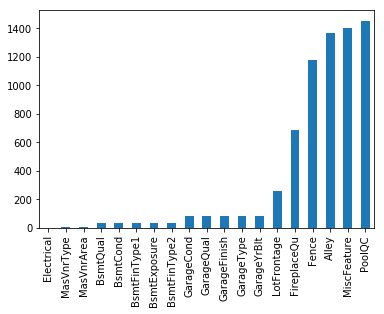

In [8]:
# Finding out the columns that are missing values in the dataset
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

We can clearly see the columns PoolQC, MiscFeature, Alley, Fence have a lot of values that are missing. But taking a closer look at the data, we understand the some part of each of these columns have information regarding the Alley or PoolQC and Fence. So right below, we are finding out the type of values each of these columns have and filling the null values with None so they are not null or NaN.

### Filling in missing values with relevant data

In [9]:
assert 'PoolQC' in categorical
assert 'MiscFeature' in categorical
assert 'Alley' in categorical
assert 'FireplaceQu' in categorical

df_train['PoolQC'] = df_train['PoolQC'].fillna('None')
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')
df_train['Fence'] = df_train['Fence'].fillna('None')
df_train['Alley'] = df_train['Alley'].fillna('None')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Finding and removing outliers in the data

((1456, 80), (1456, 80))

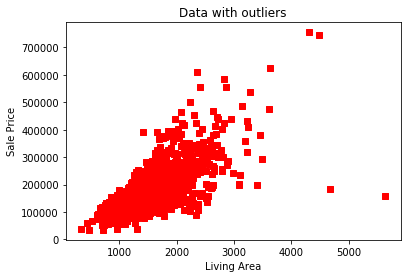

In [10]:
# Looking for outliers
plt.scatter(df_train.GrLivArea, df_train.SalePrice, color='red', marker='s')
plt.title('Data with outliers')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
# Cleaning the dataset so there are no outliers in the dataset
df_train = df_train[(df_train.GrLivArea<4000) & (df_train.SalePrice<700000)]
df_test = df_test[:df_train.shape[0]]
df_test.shape, df_train.shape

Text(0,0.5,'Sale Price')

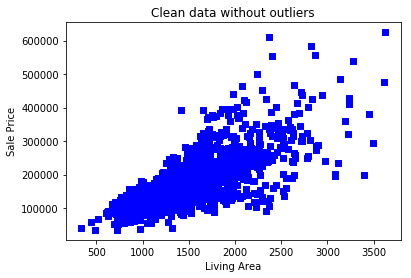

In [11]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice, color='blue', marker='s')
plt.title('Clean data without outliers')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

Now to find out how each of the variables are distributed amongst the dataset, we can pivot the table into its constituent features and find out how each variable is distributed amongst the dataset using pd.melt
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

    (eg) A B  -> A variable value
         1 2     1 B        2
         1 3     1 B        3
         2 1     2 B        1
         2 2     2 B        2

For this we can only use numeric features and not any categorical features because of the nature of sns.FacetGrid. 

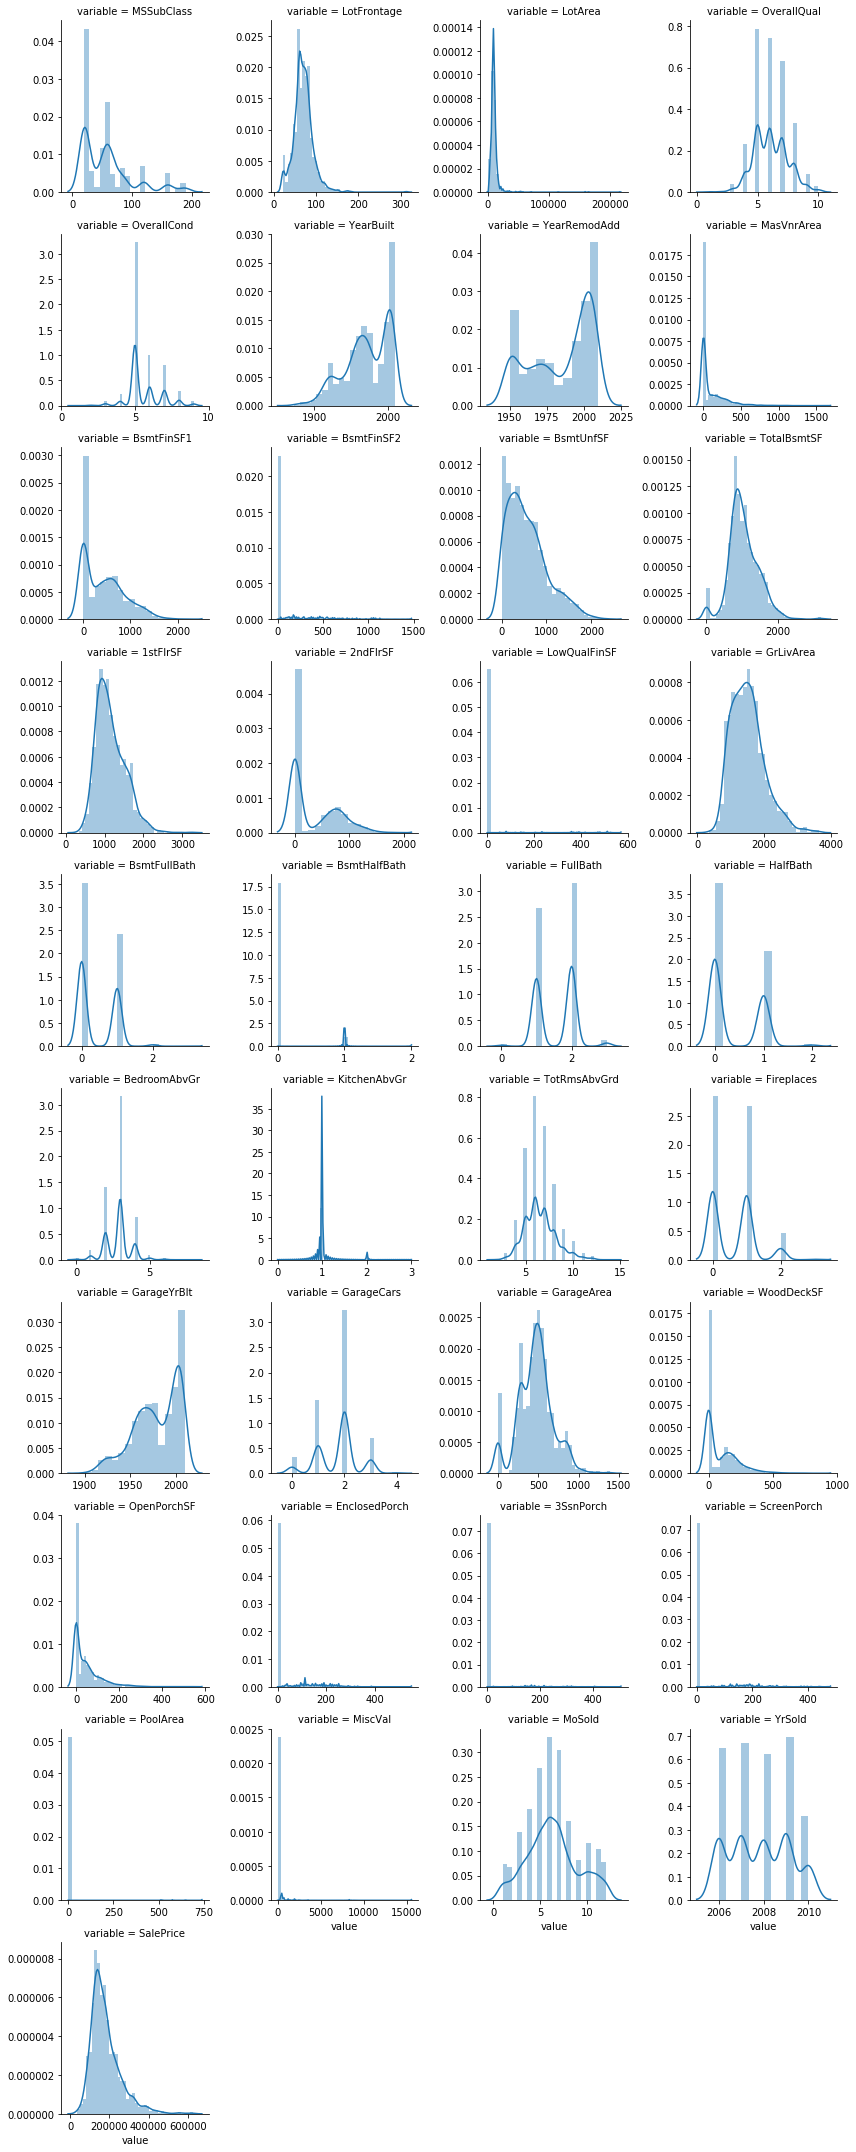

In [12]:
f = pd.melt(df_train, value_vars=numeric)
grid = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.distplot, "value")

## Analyze, identify patterns, and explore the data.

### SalePrice

In this part of the analysis, we intend to explore this dataset to find out about SalePrice which would indicate the price at which the house was sold and find out how the different features of the dataset are correlated with the Sale Price of the house

In [13]:
df_train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

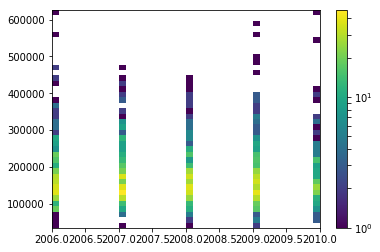

In [14]:
#Across the recession in 2008
#plt.scatter(df_train.YrSold, df_train.SalePrice, color='red', marker='s')
fig, ax = plt.subplots()
x= df_train.YrSold
y= df_train.SalePrice
counts, xedges, yedges, im = ax.hist2d(x, y, bins=40, norm=LogNorm())
plt.colorbar(im, ax=ax)
plt.show()

Thanks to GitHub user @CallToPower for the first visualization's starting code that I was able to mess around with

First Visualization
Github Link: https://github.com/CallToPower/height_dist_fifa_world_cup_2018


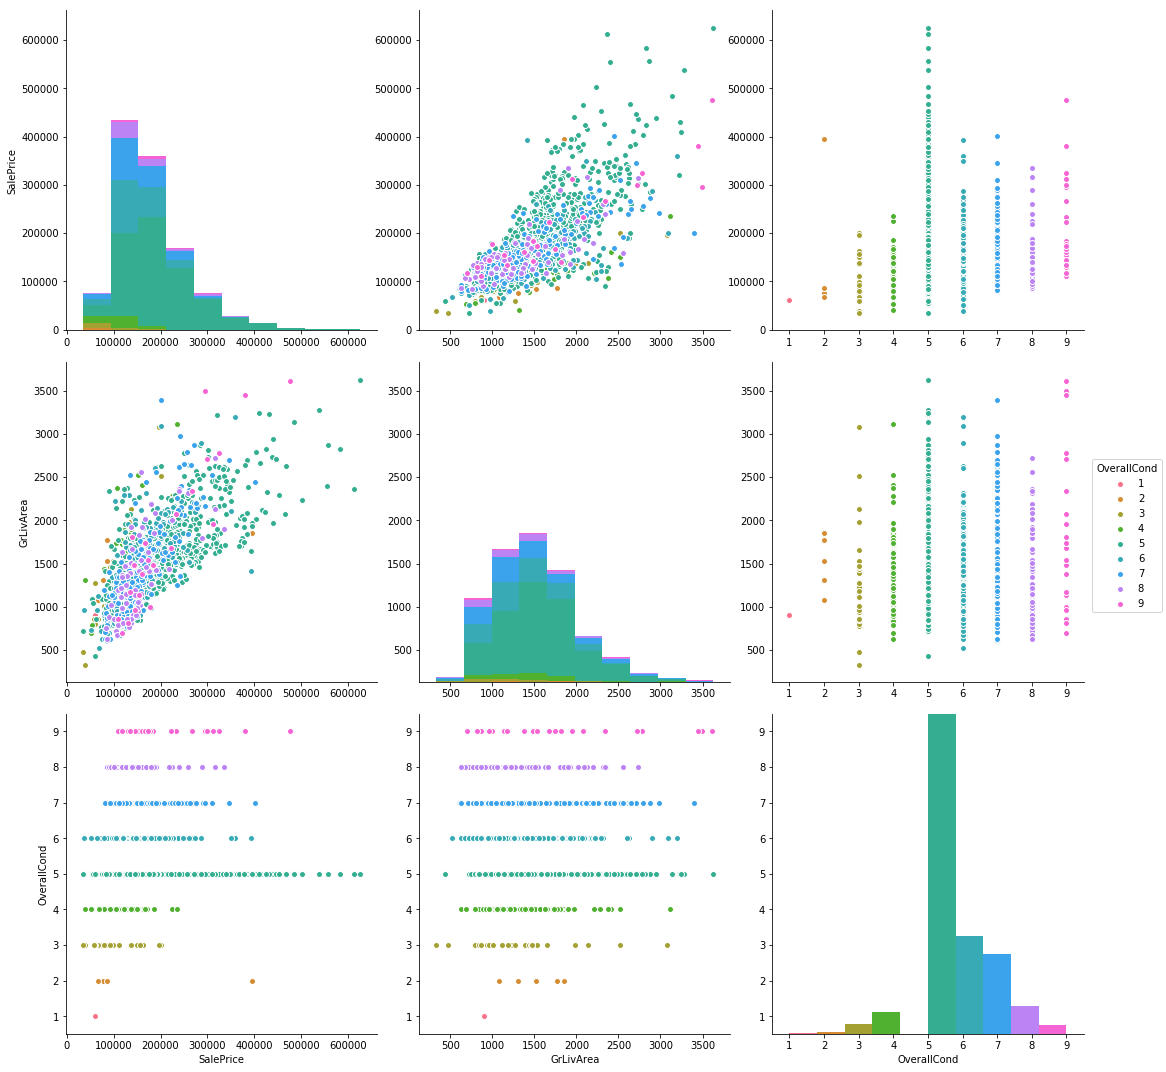

In [15]:
def cool_plot(df):
    #snsplot = sns.stripplot(y=df.SalePrice, x=df.GrLivArea,
    #                        data=df,
    #                        jitter=True,
    #                        marker='o',
    #                        alpha=0.7,
    #                        hue="YrSold")
    snsplot = sns.pairplot(df_train[['SalePrice', 'GrLivArea','OverallCond']], hue='OverallCond', palette='husl', size=5);

    #snsplot.axes.set_title(
    #    'Distributions of SalesPrices  Living Area', fontsize=16)
    #snsplot.set_xlabel('Living Area', fontsize=14)
    #snsplot.set_ylabel('Sale Price', fontsize=14)
    #snsplot.tick_params(labelsize=16)
    #fig = snsplot.get_figure()
    
    fig.set_size_inches(8, 10)
    
    plt.show()

cool_plot(df_train)

### Correlations between columns

Looking for correlations between different variables in the dataset, we find out the features that correlate the most to the SalePrice of the house in the dataset and plot the correlation matrix as a heatmap

In [16]:
corr=df_train.corr()["SalePrice"]
corrmat = df_train.corr()
corrmat.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corrmat.SalePrice)

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePrice, dtype: float64


Here we are trying to plot the correlation heatmap for each of the columns on the dataset, the last row in the correlation matrix displays the correlation of different variables to the SalePrice, lighter values have more correlation.

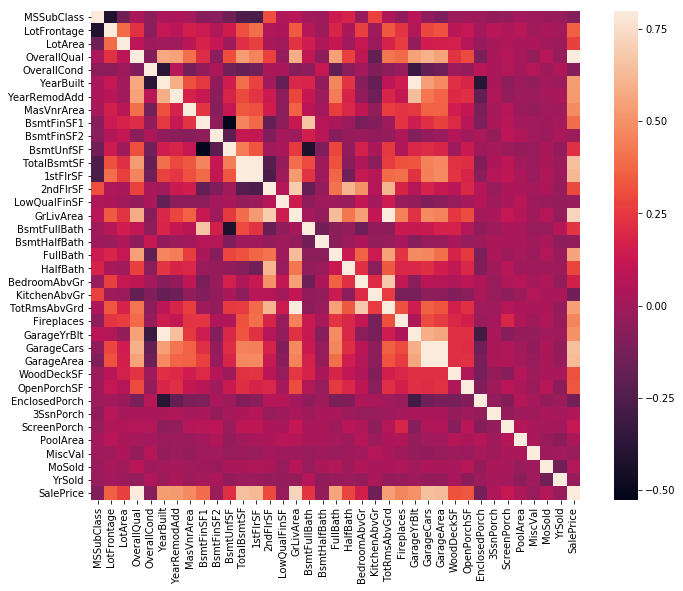

In [17]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True);

### Normalizing the data 

We take the log of the SalePrice in order to build a normalized model of the data, the reason why we do this is because regressors work better when the data is not distributed sparsely. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally. This approach was taken from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset.

Taking the log of the value of prices converts the data into a smaller range of ~10.0 to ~15.0 compared to the original SalePrice values that range from ~25000 to ~700000.

Text(0,0.5,'Number of occurences')

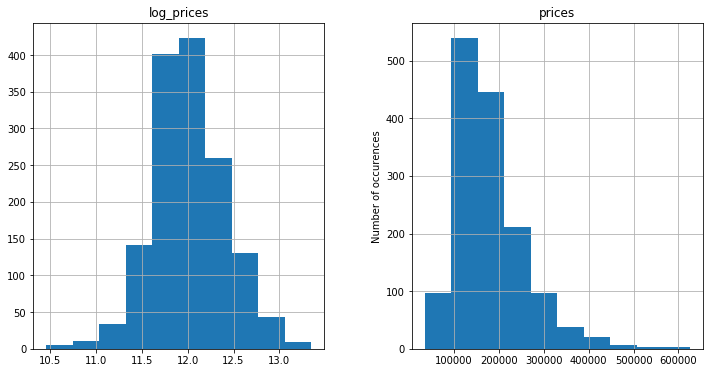

In [18]:
# Increases the size of the histogram to fit both normalized and raw data
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({'log_prices':np.log1p(df_train["SalePrice"]), 'prices': df_train["SalePrice"]})
prices.hist()
plt.ylabel('Number of occurences')

In [19]:
df_no_saleprice = df_train.drop('SalePrice', axis=1)
data = pd.concat([df_no_saleprice,df_test])
data.shape

(2912, 80)

In [20]:
#log transform the target (SalePrice which is what we need to predict):
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
df_train.shape, df_test.shape

((1456, 80), (1456, 80))

I learned how to do this from https://www.kaggle.com/apapiu/regularized-linear-models where the skew function essentially prepares the numeric data to be preprocessed, essentially regularized into a value easily processed by the predictor, Here df_train.describe explains what we are doing to the variables.

In [21]:
#log transform skewed numeric features:
skewed_feats = df_train[numeric].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df_train[skewed_feats] = np.log1p(df_train[skewed_feats])
#df_train.shape, df_test.shape
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1197.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1448.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,3.817991,4.204159,9.107632,1.939052,1.869373,7.586780,7.593733,2.123758,4.219858,0.657199,...,2.448979,2.301153,0.699936,0.085914,0.411800,0.021932,0.234097,1.912050,7.605301,2.566174
std,0.689128,0.342196,0.513351,0.200828,0.168583,0.015389,0.010428,2.625706,2.990101,1.847259,...,2.595194,2.150232,1.729301,0.667777,1.404956,0.373830,1.227653,0.423509,0.000662,0.030430
min,3.044522,3.091042,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,7.604396,2.438886
25%,3.044522,4.094345,8.927944,1.791759,1.791759,7.578145,7.584646,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,7.604894,2.547453
50%,3.931826,4.248495,9.155831,1.945910,1.791759,7.587311,7.598149,0.000000,5.945421,0.000000,...,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,7.605392,2.565066
75%,4.262680,4.394449,9.357811,2.079442,1.945910,7.601402,7.603399,5.107456,6.561737,0.000000,...,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,7.605890,2.585787
max,5.252273,5.749393,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,7.691200,7.296413,...,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,2.564949,7.606387,2.663437


pd.get_dummies : Gets all the categorical columns as 0s and 1s 

fillna(): Fills in the empty values in the dataset with mean values of each of the columns

In [22]:
data = pd.get_dummies(data)
data = data.fillna(data.mean())

In [23]:
#creating matrices for sklearn:
X_train = data[:df_train.shape[0]]
X_test = data[df_train.shape[0]:]
y = df_train.SalePrice
X_train.shape, X_test.shape, y.shape

((1456, 293), (1456, 293), (1456,))

### Regression models from sklearn

In this analysis we are going to try implement regression models from sklearn to try to fit this data, we can find more about these basic regression models in the link which has a high level explanation for each notebook http://scikit-learn.org/stable/modules/linear_model.html

In [27]:
from sklearn.linear_model import Lasso, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [28]:
model_ridge = Ridge()

In [29]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [25]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y)
y_pred = linear_regression.predict(X_test)
pd.DataFrame([y_pred])

NameError: name 'LinearRegression' is not defined

In [ ]:
rms = rmse_cv(LinearRegression())
rms